In [1]:
# importing required libraries
# Game One Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("game1.csv")

In [3]:
df.set_index('Rounds', inplace=True)
df.replace('-', 1000, inplace=True)
df = df.apply(pd.to_numeric)
winners = df.idxmin(axis=1)
w_df = pd.DataFrame({'Winner': winners})
print(w_df)

         Winner
Rounds         
1         Manav
2       Aaditya
3       Sushant
4       Sushant
5       Aaditya
6          Mith
7         Manav
8          Mith
9       Sushant
10       Gaurab
11      Sushant
12      Sushant
13        Manav
14      Aaditya
15        Manav
16       Gaurab
17       Gaurab
18      Aaditya


In [4]:
df.head()

,Aaditya,Manav,Sushant,Gaurab,Mith
Rounds,,,,,
1,5,0,5,5,5
2,0,5,15,20,5
3,10,5,0,5,5
4,5,5,0,25,30
5,0,10,10,10,20


In [5]:
df.describe()

,Aaditya,Manav,Sushant,Gaurab,Mith
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,10.833333,6.944444,8.888889,15.000000,289.444444
std,14.476147,6.216413,8.498366,16.977494,453.826505
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,1.250000,5.000000,5.000000
50%,5.000000,5.000000,7.500000,7.500000,17.500000
75%,8.750000,10.000000,13.750000,23.750000,770.000000
max,45.000000,25.000000,30.000000,60.000000,1000.000000


In [6]:
print(df)

        Aaditya  Manav  Sushant  Gaurab  Mith
Rounds                                       
1             5      0        5       5     5
2             0      5       15      20     5
3            10      5        0       5     5
4             5      5        0      25    30
5             0     10       10      10    20
6             5      5       10      25     0
7            20      0       10       5     5
8            30      5       20       5     0
9             5     10        0       5    35
10           45     10        5       0    15
11            5      5        0      60    80
12            5     25        0       5     5
13           45      0        5      25     5
14            0     10       10      10  1000
15            5      0       15      50  1000
16            5     15       20       0  1000
17            5     10       30       0  1000
18            0      5        5      15  1000


<Axes: ylabel='Rounds'>

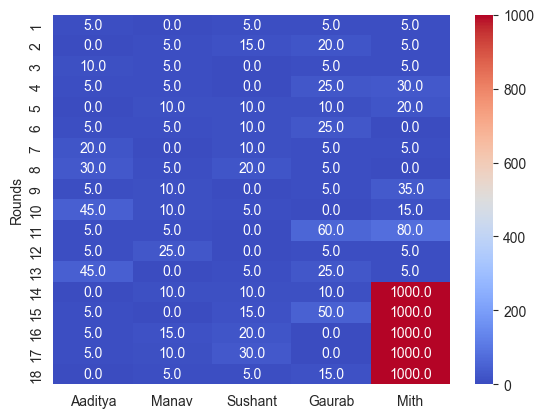

In [7]:
pivot_data = df
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f")

In [8]:
results = []

for index, row in df.iterrows():
    filtered_row = row[row != 1000]
    if not filtered_row.empty:
        min_score = filtered_row.min()
        winners = filtered_row[filtered_row == min_score].index.tolist()
      
        for winner in winners:
            results.append({'Round': index, 'Total': filtered_row.sum(), 'Winner': winner})

winner_df = pd.DataFrame(results)

winner_df.set_index('Round', inplace=True)

print(winner_df)

       Total   Winner
Round                
1         20    Manav
2         45  Aaditya
3         25  Sushant
4         65  Sushant
5         50  Aaditya
6         45     Mith
7         40    Manav
8         60     Mith
9         55  Sushant
10        75   Gaurab
11       150  Sushant
12        40  Sushant
13        80    Manav
14        30  Aaditya
15        70    Manav
16        40   Gaurab
17        45   Gaurab
18        25  Aaditya


In [9]:
win_counts = winner_df['Winner'].value_counts()
print(win_counts)

Winner
Sushant    5
Manav      4
Aaditya    4
Gaurab     3
Mith       2
Name: count, dtype: int64


In [10]:
for index, row in df.iterrows():
    filtered_row = row[row != 1000]

    sum_row = filtered_row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in filtered_row.items() if val == 0]
    num_winners = len(winners)
    
    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            print(f"At Round: {index}, {winner} is owed: {debt_per_winner}")


At Round: 1, Manav is owed: 20.0
At Round: 2, Aaditya is owed: 45.0
At Round: 3, Sushant is owed: 25.0
At Round: 4, Sushant is owed: 65.0
At Round: 5, Aaditya is owed: 50.0
At Round: 6, Mith is owed: 45.0
At Round: 7, Manav is owed: 40.0
At Round: 8, Mith is owed: 60.0
At Round: 9, Sushant is owed: 55.0
At Round: 10, Gaurab is owed: 75.0
At Round: 11, Sushant is owed: 150.0
At Round: 12, Sushant is owed: 40.0
At Round: 13, Manav is owed: 80.0
At Round: 14, Aaditya is owed: 30.0
At Round: 15, Manav is owed: 70.0
At Round: 16, Gaurab is owed: 40.0
At Round: 17, Gaurab is owed: 45.0
At Round: 18, Aaditya is owed: 25.0


In [11]:
winners_owed = {}

for index, row in df.iterrows():
    filtered_row = row[row != 1000]

    sum_row = filtered_row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in filtered_row.items() if val == 0]
    num_winners = len(winners)
    
    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            if winner not in winners_owed:
                winners_owed[winner] = 0
            winners_owed[winner] += debt_per_winner

for winner, amount in winners_owed.items():
    print(f"{winner}: {amount}")


Manav: 210.0
Aaditya: 150.0
Sushant: 335.0
Mith: 105.0
Gaurab: 160.0


In [12]:
sum_owed = {player1: {player2: 0 for player2 in df.columns if player2 != player1} for player1 in df.columns}

for player1, col1 in df.items():
    for player2, col2 in df.items():
        if player1 != player2:
            for score1, score2 in zip(col1, col2):
                # Skip the round if either player did not participate
                if score1 != 1000 and score2 != 1000:
                    if score1 > score2:
                        sum_owed[player1][player2] += score1 - score2

output = []

for player1, debts in sum_owed.items():
    for player2, amount in debts.items():
        if amount > 0:
            output.append(f"{player1} owes {amount} to {player2}")

# output
for item in output:
    print(item)


Aaditya owes 140 to Manav
Aaditya owes 130 to Sushant
Aaditya owes 120 to Gaurab
Aaditya owes 125 to Mith
Manav owes 70 to Aaditya
Manav owes 55 to Sushant
Manav owes 60 to Gaurab
Manav owes 30 to Mith
Sushant owes 95 to Aaditya
Sushant owes 90 to Manav
Sushant owes 75 to Gaurab
Sushant owes 45 to Mith
Gaurab owes 195 to Aaditya
Gaurab owes 205 to Manav
Gaurab owes 185 to Sushant
Gaurab owes 65 to Mith
Mith owes 155 to Aaditya
Mith owes 155 to Manav
Mith owes 175 to Sushant
Mith owes 80 to Gaurab


In [13]:
# Initializing empty lists for new DataFrame columns
debtor = []
amount = []
creditor = []

for line in output:
    parts = line.split()
    debtor.append(parts[0])
    amount.append(int(parts[2]))  
    creditor.append(parts[4]) 

new_df = pd.DataFrame({'Debtor': debtor, 'Amount': amount, 'Creditor': creditor})

# Display the new DataFrame
print(new_df)

     Debtor  Amount Creditor
0   Aaditya     140    Manav
1   Aaditya     130  Sushant
2   Aaditya     120   Gaurab
3   Aaditya     125     Mith
4     Manav      70  Aaditya
5     Manav      55  Sushant
6     Manav      60   Gaurab
7     Manav      30     Mith
8   Sushant      95  Aaditya
9   Sushant      90    Manav
10  Sushant      75   Gaurab
11  Sushant      45     Mith
12   Gaurab     195  Aaditya
13   Gaurab     205    Manav
14   Gaurab     185  Sushant
15   Gaurab      65     Mith
16     Mith     155  Aaditya
17     Mith     155    Manav
18     Mith     175  Sushant
19     Mith      80   Gaurab


In [14]:
# Initialize a dictionary to store adjustments
adjustments = {}

# Iterate over the DataFrame to identify adjustments
for index, row in new_df.iterrows():
    debtor = row['Debtor']
    amount = row['Amount']
    creditor = row['Creditor']

    # Check if the reverse debt (creditor as debtor and vice versa) exists
    reverse_key = (creditor, debtor)
    current_key = (debtor, creditor) 
    if reverse_key in adjustments:
        # Calculate the net amount after adjustment
        net_amount = amount - adjustments[reverse_key]

        if net_amount > 0:
            adjustments[current_key] = net_amount
            adjustments[reverse_key] = 0
        else:
            adjustments[reverse_key] -= amount
            adjustments[current_key] = 0
    else:
        # If no reverse debt, add the current debt to adjustments
        adjustments[current_key] = amount

# Apply the adjustments to the DataFrame
for (debtor, creditor), amount in adjustments.items():
    new_df.loc[(new_df['Debtor'] == debtor) & (new_df['Creditor'] == creditor), 'Amount'] = amount

# Remove rows with zero amount (fully adjusted debts)
new_df = new_df[new_df['Amount'] > 0]

# Print the final result
print(new_df)

     Debtor  Amount Creditor
0   Aaditya      70    Manav
1   Aaditya      35  Sushant
9   Sushant      35    Manav
12   Gaurab      75  Aaditya
13   Gaurab     145    Manav
14   Gaurab     110  Sushant
16     Mith      30  Aaditya
17     Mith     125    Manav
18     Mith     130  Sushant
19     Mith      15   Gaurab


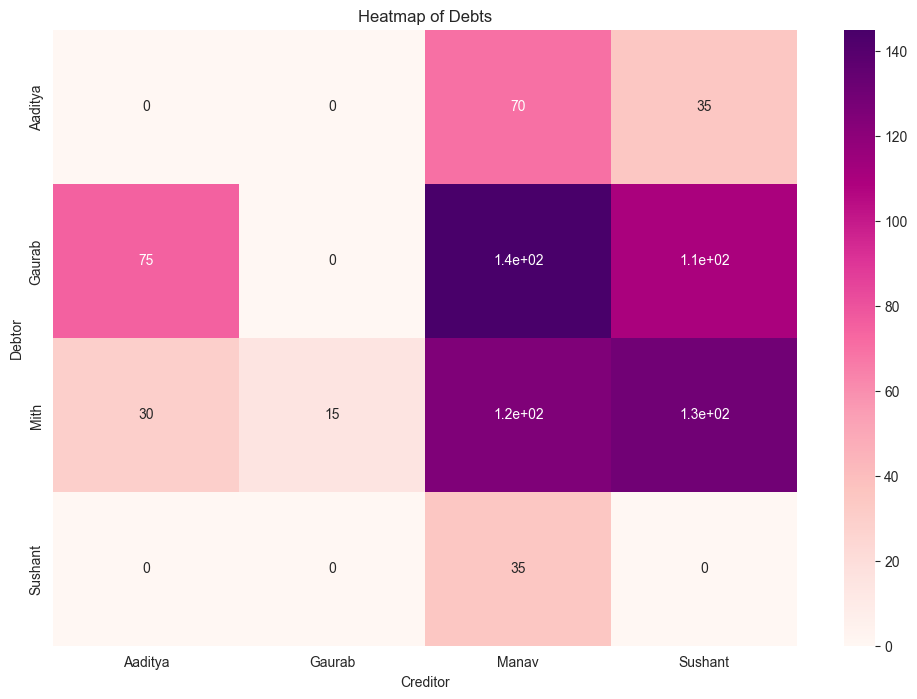

In [19]:
# Creating a pivot table for the heatmap
new_pivot_table = new_df.pivot(index='Debtor', columns='Creditor', values='Amount')
new_pivot_table = new_pivot_table.fillna(0)  # Replacing NaN with 0

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(new_pivot_table, annot=True, cmap="RdPu")
plt.title('Heatmap of Debts')
plt.xlabel('Creditor')
plt.ylabel('Debtor')
plt.show()

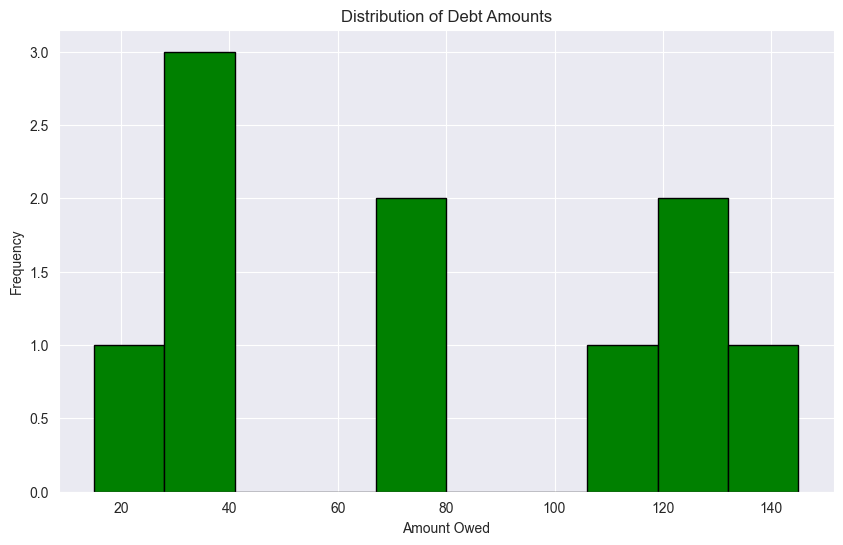

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(new_df['Amount'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Debt Amounts')
plt.xlabel('Amount Owed')
plt.ylabel('Frequency')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Features and Target Variable
X = winner_df.drop('Winner', axis=1)  # Features
y = winner_df['Winner']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# finally Evaluating the model
print(classification_report(y_test, predictions))

#small dataset resulted in the model being not able to correctly classify any of the instances in this test set. 

              precision    recall  f1-score   support

     Aaditya       0.00      0.00      0.00       1.0
      Gaurab       0.00      0.00      0.00       0.0
       Manav       0.00      0.00      0.00       1.0
        Mith       0.00      0.00      0.00       1.0
     Sushant       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0


C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Simplified model
model = LogisticRegression()

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

print(f"Cross-validated F1 scores: {scores}")
print(f"Average F1 score: {scores.mean()}")

# Hyperparameter tuning (limited)
# Example: Trying different values of C
C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C)
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_C = C

print(f"Best F1 score: {best_score} with C = {best_C}")

# Train final model with best hyperparameter
final_model = LogisticRegression(C=best_C)
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
print(classification_report(y_test, predictions))


Cross-validated F1 scores: [0.         0.16666667 0.375      0.         0.25      ]
Average F1 score: 0.15833333333333333
Best F1 score: 0.18333333333333332 with C = 0.01
              precision    recall  f1-score   support

     Aaditya       0.00      0.00      0.00         1
       Manav       0.00      0.00      0.00         1
        Mith       0.00      0.00      0.00         1
     Sushant       0.33      1.00      0.50         1

    accuracy                           0.25         4
   macro avg       0.08      0.25      0.12         4
weighted avg       0.08      0.25      0.12         4


C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users